In [757]:
import numpy as np 
import pandas as pd 
import re  # search pattern in string ( text) 
import nltk # nlp 
import matplotlib.pyplot as plt
%matplotlib inline

In [758]:
toi=pd.read_excel(r"abc.xlsx")

In [759]:
toi

,Text,text
0,vidya,Bestii
1,vidya,Bestii
2,vidya,Bestii
3,vidya,Bestii
4,vidya,Bestii
...,...,...
1062,suvarna,NaN
1063,suvarna,NaN
1064,suvarna,NaN
1065,suvarna,NaN


In [760]:
toi.shape

(1067, 2)

In [761]:
toi.head()

,Text,text
0,vidya,Bestii
1,vidya,Bestii
2,vidya,Bestii
3,vidya,Bestii
4,vidya,Bestii


In [762]:
data=pd.DataFrame(toi.Text)
data.head()

,Text
0,vidya
1,vidya
2,vidya
3,vidya
4,vidya


In [763]:
data.iloc[4,0]  # [ Row , Column]

'vidya'

In [764]:
data.iloc[1,0]

'vidya'

# Converted to Lower 

In [765]:
data.text=data.Text.str.lower()

C:\Users\L\AppData\Local\Temp\ipykernel_11668\2519955499.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.text=data.Text.str.lower()


In [766]:
data.iloc[1,0]

'vidya'

In [767]:
data.iloc[4,0]

'vidya'

# Removing Url
\S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
(+) == one or more occurance

In [768]:
data.text = data.text.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[1,0]

C:\Users\L\AppData\Local\Temp\ipykernel_11668\372877947.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.text = data.text.str.replace(r'http\S+|www.\S+','',case=False)


'vidya'

# Remove punctuation

In [769]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [770]:
def remove_punctuation(abc):
    text_nopunt="".join([c  # c= delhi
                         for c in abc # c = Delhi 
                         if c not in string.punctuation])
    return text_nopunt

In [771]:
data.text=data.text.apply(lambda x : remove_punctuation(x)) # Text = x

In [772]:
data.iloc[1,0]

'vidya'

In [773]:
data.iloc[4,0]

'vidya'

# Remove Number

In [774]:
data.iloc[57,0]

'motivate'

\d == Returns a match where the string contains digits (numbers from 0-9)

(+) == one or more occurance

In [775]:
data.text = data.text.str.replace('\d+','')

C:\Users\L\AppData\Local\Temp\ipykernel_11668\1943211593.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.text = data.text.str.replace('\d+','')


In [776]:
data.iloc[57,0]

'motivate'

# Removing Stop Words

In [777]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [778]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('English')

In [779]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [780]:
data.iloc[900,0]

'mona'

In [781]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data.text = data.text.apply(lambda x: ' '.join([c   # form  is not added   # text = x
                                                      for c in x.split()  # c = from
                                                      if c not in (stop)]))

# Common Words

In [782]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\L\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'Rhabdopleura',
 'pixy',
 'unifoliar',
 'bishopship',
 'featheredge',
 'discriminantal',
 'foreguidance',
 'strokesman',
 'monotrophic',
 'Bipaliidae',
 'Roxana',
 'stellated',
 'differently',
 'Turcize',
 'evince',
 'septically',
 'meadow',
 'Calothrix',
 'archprelate',
 'foison',
 'intraformational',
 'epitaphless',
 'octodecimal',
 'perfectionist',
 'collage',
 'preroyally',
 'nidificate',
 'brosot',
 'brinishness',
 'pharmacopoeia',
 'sarraceniaceous',
 'inappreciation',
 'undispersed',
 'troy',
 'gentility',
 'unpenned',
 'longwork',
 'jadeite',
 'disrobe',
 'dustee',
 'prostitute',
 'eleventhly',
 'triumphant',
 'zanyism',
 'gunyah',
 'permanency',
 'polyuric',
 'declamatoriness',
 'Siegurd',
 'Enchytraeus',
 'duckblind',
 'griffinage',
 'upmix',
 'diplococcus',
 'unoecumenic',
 'nose',
 'Manchestrian',
 'prediscuss',
 'Parisianize',
 'Encyrtidae',
 'tikitiki',
 'cariosity',
 'buckish',
 'uncongregated',
 'prebaptismal',
 'invalorous',
 'apostrophied',
 'semidependent',
 'miniki

In [783]:
text=data.text[3]
text

'vidya'

In [784]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like S or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you word tokens 
                    if w.lower() in words)  # dictionary     
    return text

round2 = lambda x: clean_text_round2(x)

In [785]:
# Let's take a look at the updated text
data = pd.DataFrame(data.text.apply(round2))
data.iloc[900,0]

'mona'

# Lemmatization

In [786]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\L\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [787]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") ## v = verb   = arrest
            for w in w_tokenizer.tokenize(abc)]  # word tokenizer  w = arresting

In [788]:
data.iloc[900,0]

'mona'

In [789]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\L\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [790]:
data.text = data.Text.apply(lambda x :' '.join(lemmatize_text(x)))  # text = x
data.iloc[900,0]

C:\Users\L\AppData\Local\Temp\ipykernel_11668\3913153453.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.text = data.Text.apply(lambda x :' '.join(lemmatize_text(x)))  # text = x


'mona'

# Strip extra whitespace

In [791]:
data.text = data.text.str.rstrip()
data.iloc[900,0]

'mona'

# Document-Term Matrix
For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [792]:
data.text[8]

'vidya'

In [793]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data.text)  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # document term matrix

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

C:\Users\L\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066
amaze,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ambitious,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
careful,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
clever,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
close,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
confident,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
good,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
happy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [794]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,1058,1059,1060,1061,1062,1063,1064,1065,1066,freq
amaze,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
ambitious,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
bad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
brave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
careful,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [795]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,1058,1059,1060,1061,1062,1063,1064,1065,1066,freq
0,amaze,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,ambitious,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,bad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,brave,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
4,careful,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [796]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

C:\Users\L\AppData\Local\Temp\ipykernel_11668\218960368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.rename(columns = {'index':'Word'}, inplace = True)
C:\Users\L\AppData\Local\Temp\ipykernel_11668\218960368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


,Word,freq
15,vidya,126
12,mona,110
13,motivate,86
10,intelligent,52
14,smart,42
3,brave,21
9,happy,21
2,bad,15
6,close,15
7,confident,15


# Barplot 

In [797]:
tdm1.head(10)

,Word,freq
15,vidya,126
12,mona,110
13,motivate,86
10,intelligent,52
14,smart,42
3,brave,21
9,happy,21
2,bad,15
6,close,15
7,confident,15


In [798]:
w = tdm1[tdm1['freq'] >10]
w

,Word,freq
15,vidya,126
12,mona,110
13,motivate,86
10,intelligent,52
14,smart,42
3,brave,21
9,happy,21
2,bad,15
6,close,15
7,confident,15


C:\Users\L\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\L\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


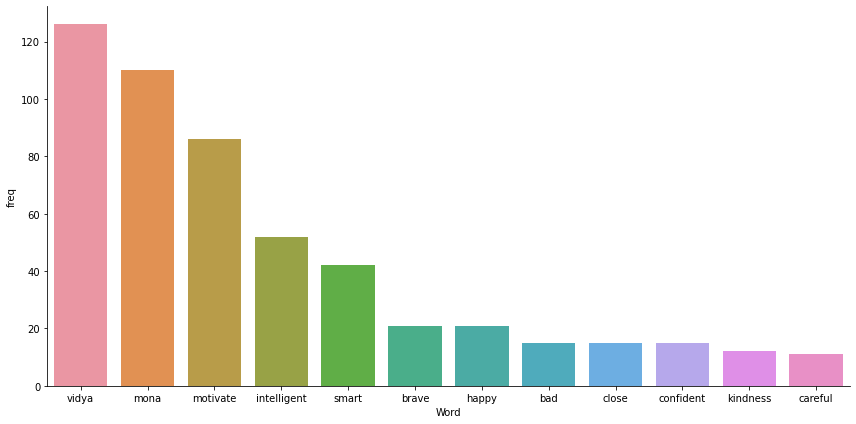

In [799]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [800]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 4458 words in the combination of all review.


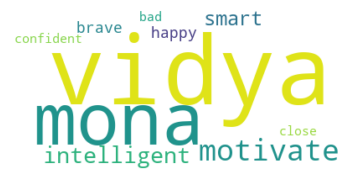

In [801]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cloud Wordcloud

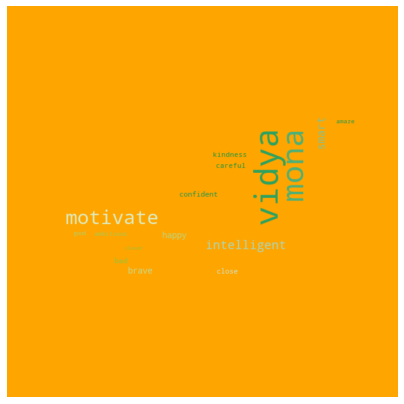

In [802]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("Plant.jpg")) # shape & colour
abc = WordCloud(stopwords=stopwords,
                           background_color='orange',
                           mode="RGBA", # combination of colour
                           max_words=27000, 
                           mask=mask,  ### shape of leaf
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask) # colour OF leaf
plt.figure(figsize=[7,10])  # facecolor='k' to give round box
plt.imshow(abc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

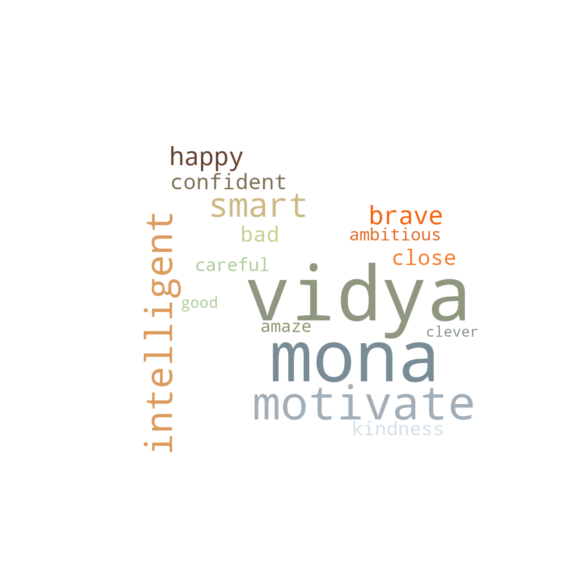

In [803]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("Family.png"))  # shape & colour
xyz = WordCloud(stopwords=stopwords,
                           background_color='white',
                           max_words=27000,
                           mask=mask,  # shape
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask) # colour
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(xyz.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

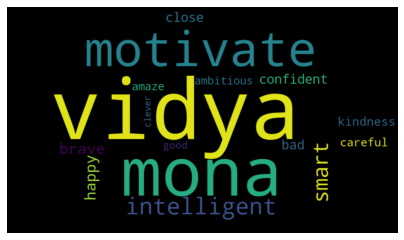

In [804]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("demo6.png"))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='black',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,10])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

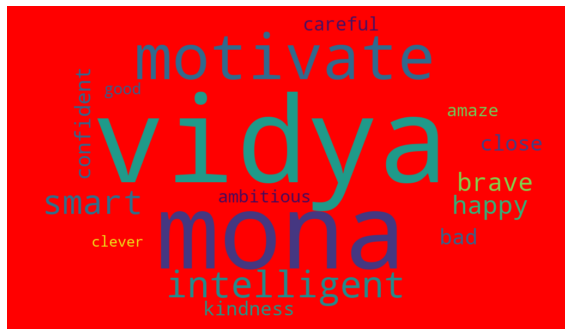

In [805]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("demo6.png"))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='red',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()